In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.utils import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(72)
tf.random.set_seed(72)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

C:\Users\HSSL77\anaconda3\envs\tf_gpu_final\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



In [2]:
def evaluate_(model, generator_test):
    model.evaluate(generator_test)
    
    y_pred = model.predict(generator_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator_test.classes
    class_labels = list(generator_test.class_indices.keys())

    print(classification_report(y_true, y_pred_classes))
    cm = confusion_matrix(y_true, y_pred_classes)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.show()

In [3]:
train_dir = r"D:\Personal\knee\data\train"
test_dir = r"D:\Personal\knee\data\val"
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test = ImageDataGenerator(rescale=1./255)


batch_size = 8
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=(112, 112),
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=(112, 112),
                                                  batch_size=batch_size,
                                                  shuffle=False)
# Calculate class weights
labels = generator_train.classes
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels), y=labels)
class_weights = dict(zip(np.unique(labels), class_weights))
print(class_weights)

Found 7304 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
{0: 0.5054671280276817, 1: 1.1058289174867524, 2: 0.7612298071912454, 3: 1.5264367816091955, 4: 6.731797235023041}


In [4]:
from keras_cv_attention_models import coatnet
mm = coatnet.CoAtNet0(input_shape=(112, 112, 3), pretrained="imagenet")

>>>> Load pretrained from: C:\Users\HSSL77\.keras\models\coatnet0_160_imagenet.h5
>>>> Reload mismatched weights: 160 -> (112, 112)
>>>> Reload layer: stack_3_block_1_mhsa_pos_emb
>>>> Reload layer: stack_3_block_2_mhsa_pos_emb
>>>> Reload layer: stack_3_block_3_mhsa_pos_emb
>>>> Reload layer: stack_3_block_4_mhsa_pos_emb
>>>> Reload layer: stack_3_block_5_mhsa_pos_emb
>>>> Reload layer: stack_4_block_1_mhsa_pos_emb
>>>> Reload layer: stack_4_block_2_mhsa_pos_emb


In [5]:
# mm.summary()

In [6]:
"""
transfer_layer = mm.get_layer('avg_pool')
conv_model = Model(inputs=mm.input, outputs=transfer_layer.output)
"""

"\ntransfer_layer = mm.get_layer('avg_pool')\nconv_model = Model(inputs=mm.input, outputs=transfer_layer.output)\n"

In [7]:
"""
#for layer in conv_model.layers:
#    layer.trainable = False
    
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)


# Add the final layer for the actual classification.
new_model.add(Dense(2, activation='softmax'))
"""

"\n#for layer in conv_model.layers:\n#    layer.trainable = False\n    \n# Start a new Keras Sequential model.\nnew_model = Sequential()\n\n# Add the convolutional part of the VGG16 model from above.\nnew_model.add(conv_model)\n\n\n# Add the final layer for the actual classification.\nnew_model.add(Dense(2, activation='softmax'))\n"

In [5]:
from keras_cv_attention_models import beit
mm2 = beit.BeitBasePatch16(input_shape=(112, 112, 3))

>>>> Load pretrained from: C:\Users\HSSL77\.keras\models\beit_base_patch16_224_imagenet21k-ft1k.h5
>>>> Reload mismatched weights: 224 -> (112, 112)
>>>> Reload layer: block0_attn_pos_emb
>>>> Reload layer: block1_attn_pos_emb
>>>> Reload layer: block2_attn_pos_emb
>>>> Reload layer: block3_attn_pos_emb
>>>> Reload layer: block4_attn_pos_emb
>>>> Reload layer: block5_attn_pos_emb
>>>> Reload layer: block6_attn_pos_emb
>>>> Reload layer: block7_attn_pos_emb
>>>> Reload layer: block8_attn_pos_emb
>>>> Reload layer: block9_attn_pos_emb
>>>> Reload layer: block10_attn_pos_emb
>>>> Reload layer: block11_attn_pos_emb


In [9]:
# mm2.summary()

In [6]:
mm_last_layer = mm.get_layer('avg_pool').output
#out = Dense(256, activation='relu', name='dense_1')(mm_last_layer)
#out = Dense(11, activation='softmax', name='prediction1')(out)
mm_custom = Model(mm.input, mm_last_layer)

In [7]:
mm2_last_layer = mm2.get_layer('out_ln').output
#out2 = Dense(256, activation='relu', name='dense_1')(mm2_last_layer)
#out2 = Dense(11, activation='softmax', name='prediction1')(out2)
mm2_custom = Model(mm2.input, mm2_last_layer)

In [9]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(112,112,3))
outputs = layers.average([mm_custom(inputs), mm2_custom(inputs)])

avg_ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
avg_ensemble_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 768)          22487658    ['input_4[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 768)          85681344    ['input_4[0][0]']                
                                                                                                  
 average_1 (Average)            (None, 768)          0           ['model[1][0]',            

In [15]:
num_classes = 5
avg_ensemble_model_last_layer = avg_ensemble_model.get_layer('average_1').output
output_layer = Dense(num_classes, activation='softmax', name='output_1')(avg_ensemble_model_last_layer)
final_model = Model(avg_ensemble_model.input, output_layer)

final_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 768)          22487658    ['input_4[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 768)          85681344    ['input_4[0][0]']                
                                                                                                  
 average_1 (Average)            (None, 768)          0           ['model[1][0]',            

In [16]:
optimizer = Adam(lr=1e-5)
loss = 'categorical_crossentropy'
# metrics = ['categorical_accuracy']
metrics = ['accuracy', 'categorical_accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 
           tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), 
           tf.keras.metrics.FalseNegatives(), tfa.metrics.CohenKappa(num_classes = num_classes), 
           tfa.metrics.F1Score(num_classes = num_classes)]

final_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1,
    patience=9, mode="max", min_delta=0.0001, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint(filepath='Best_DenseNet201.h5', save_best_only=True, monitor = 'val_accuracy', verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

callbacks = [lr, checkpoint, early_stopping]

In [18]:
epochs = 35

steps_per_epoch = generator_train.n / batch_size
steps_test = generator_test.n / batch_size

history = final_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test,
                                   callbacks=callbacks, class_weight =class_weights)

Epoch 1/35


C:\Users\HSSL77\AppData\Local\Temp\ipykernel_3760\2955919758.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = final_model.fit_generator(generator=generator_train,


913/913 [==============================] - ETA: 0s - loss: 1.4176 - accuracy: 0.3235 - categorical_accuracy: 0.3235 - auc_1: 0.6863 - precision_1: 0.4236 - recall_1: 0.0623 - true_positives_1: 455.0000 - true_negatives_1: 28597.0000 - false_positives_1: 619.0000 - false_negatives_1: 6849.0000 - cohen_kappa: 0.1170 - f1_score: 0.2849

C:\Users\HSSL77\anaconda3\envs\tf_gpu_final\lib\site-packages\keras\engine\training.py:2034: UserWarning: Metric CohenKappa implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()
C:\Users\HSSL77\anaconda3\envs\tf_gpu_final\lib\site-packages\keras\engine\training.py:2034: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()



Epoch 1: val_accuracy improved from -inf to 0.33777, saving model to Best_DenseNet201.h5
913/913 [==============================] - 236s 232ms/step - loss: 1.4176 - accuracy: 0.3235 - categorical_accuracy: 0.3235 - auc_1: 0.6863 - precision_1: 0.4236 - recall_1: 0.0623 - true_positives_1: 455.0000 - true_negatives_1: 28597.0000 - false_positives_1: 619.0000 - false_negatives_1: 6849.0000 - cohen_kappa: 0.1170 - f1_score: 0.2849 - val_loss: 1.3314 - val_accuracy: 0.3378 - val_categorical_accuracy: 0.3378 - val_auc_1: 0.7397 - val_precision_1: 0.4949 - val_recall_1: 0.0593 - val_true_positives_1: 49.0000 - val_true_negatives_1: 3254.0000 - val_false_positives_1: 50.0000 - val_false_negatives_1: 777.0000 - val_cohen_kappa: 0.1602 - val_f1_score: 0.3807 - lr: 1.0000e-05
Epoch 2/35
913/913 [==============================] - ETA: 0s - loss: 1.0211 - accuracy: 0.4826 - categorical_accuracy: 0.4826 - auc_1: 0.8216 - precision_1: 0.6149 - recall_1: 0.2301 - true_positives_1: 1681.0000 - true_n

Epoch 9/35
913/913 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.6280 - categorical_accuracy: 0.6280 - auc_1: 0.9064 - precision_1: 0.7158 - recall_1: 0.5049 - true_positives_1: 3688.0000 - true_negatives_1: 27752.0000 - false_positives_1: 1464.0000 - false_negatives_1: 3616.0000 - cohen_kappa: 0.4944 - f1_score: 0.6628
Epoch 9: val_accuracy did not improve from 0.59685
913/913 [==============================] - 269s 295ms/step - loss: 0.6790 - accuracy: 0.6280 - categorical_accuracy: 0.6280 - auc_1: 0.9064 - precision_1: 0.7158 - recall_1: 0.5049 - true_positives_1: 3688.0000 - true_negatives_1: 27752.0000 - false_positives_1: 1464.0000 - false_negatives_1: 3616.0000 - cohen_kappa: 0.4944 - f1_score: 0.6628 - val_loss: 0.9734 - val_accuracy: 0.5630 - val_categorical_accuracy: 0.5630 - val_auc_1: 0.8765 - val_precision_1: 0.6194 - val_recall_1: 0.4867 - val_true_positives_1: 402.0000 - val_true_negatives_1: 3057.0000 - val_false_positives_1: 247.0000 - val_fal

Epoch 17/35
913/913 [==============================] - ETA: 0s - loss: 0.5642 - accuracy: 0.6863 - categorical_accuracy: 0.6863 - auc_1: 0.9310 - precision_1: 0.7467 - recall_1: 0.6023 - true_positives_1: 4399.0000 - true_negatives_1: 27724.0000 - false_positives_1: 1492.0000 - false_negatives_1: 2905.0000 - cohen_kappa: 0.5744 - f1_score: 0.7322
Epoch 17: val_accuracy did not improve from 0.61017
913/913 [==============================] - 271s 297ms/step - loss: 0.5642 - accuracy: 0.6863 - categorical_accuracy: 0.6863 - auc_1: 0.9310 - precision_1: 0.7467 - recall_1: 0.6023 - true_positives_1: 4399.0000 - true_negatives_1: 27724.0000 - false_positives_1: 1492.0000 - false_negatives_1: 2905.0000 - cohen_kappa: 0.5744 - f1_score: 0.7322 - val_loss: 0.9442 - val_accuracy: 0.5884 - val_categorical_accuracy: 0.5884 - val_auc_1: 0.8839 - val_precision_1: 0.6219 - val_recall_1: 0.4879 - val_true_positives_1: 403.0000 - val_true_negatives_1: 3059.0000 - val_false_positives_1: 245.0000 - val_f

104/104 [==============================] - 10s 96ms/step - loss: 0.9073 - accuracy: 0.6102 - categorical_accuracy: 0.6102 - auc_1: 0.8919 - precision_1: 0.6795 - recall_1: 0.5109 - true_positives_1: 422.0000 - true_negatives_1: 3105.0000 - false_positives_1: 199.0000 - false_negatives_1: 404.0000 - cohen_kappa: 0.4498 - f1_score: 0.5832
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       328
           1       0.28      0.11      0.16       153
           2       0.57      0.63      0.60       212
           3       0.70      0.67      0.69       106
           4       0.64      0.93      0.76        27

    accuracy                           0.61       826
   macro avg       0.57      0.62      0.58       826
weighted avg       0.57      0.61      0.58       826



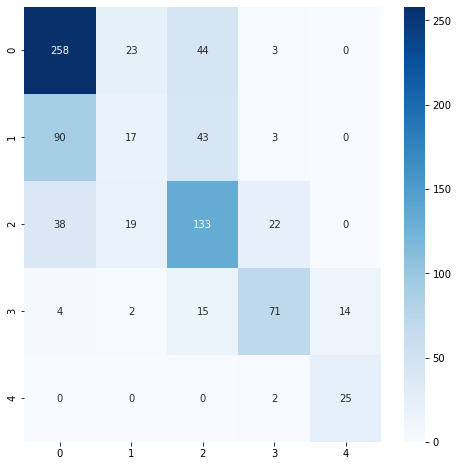

In [19]:
evaluate_(final_model, generator_test)

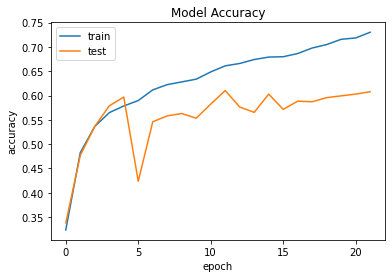

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

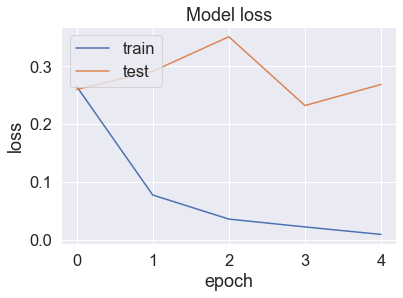

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()